<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

The goal here is to display the proportions of frames for each VD, each CP condition, and each subject.

In [1]:
library(data.table)
library(ggplot2)

In [2]:
subj <- '15'
dots <- fread(paste("../data/Pilot", subj, "/pilot",subj,"_dotsPositions.csv", sep=''))

In [3]:
str(dots)

Classes ‘data.table’ and 'data.frame':	391920 obs. of  8 variables:
 $ xpos       : num  0.5997 0.0315 0.4435 0.2796 0.0924 ...
 $ ypos       : num  0.496 0.352 0.5 0.151 0.933 ...
 $ isActive   : int  1 0 0 1 0 0 1 0 0 1 ...
 $ isCoherent : int  1 0 0 1 0 0 0 0 0 0 ...
 $ frameIdx   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ seqDumpTime: num  6049 6049 6049 6049 6049 ...
 $ pilotID    : int  15 15 15 15 15 15 15 15 15 15 ...
 $ taskID     : int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [9]:
numF <- unique(dots[,.(numFrames=max(frameIdx), taskID), by=.(seqDumpTime)])

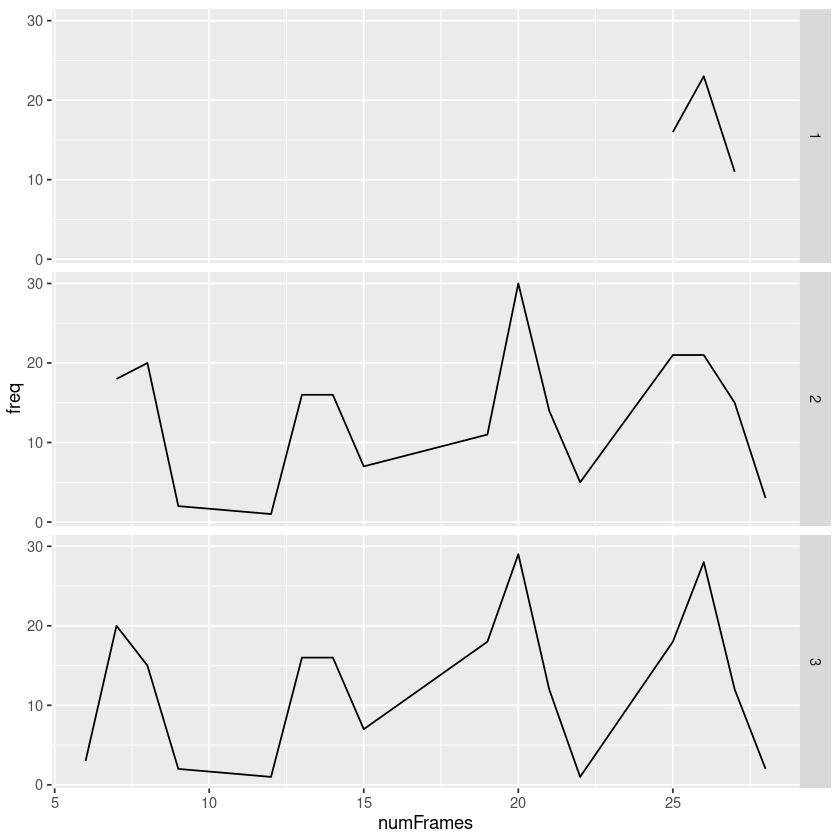

In [16]:
ggplot(numF[,.(freq=.N), by=.(numFrames, taskID)], aes(x=numFrames, y=freq)) + geom_line() + facet_grid(taskID~.)